In [1]:
import glob
import os

import krippendorff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings

from distinctipy import distinctipy

In [2]:
# Gestion des warnings
warnings.filterwarnings("ignore")

# Agrégation des tableaux de veille

In [3]:
# Chemin vers le dossier 'data'
data_dir = "data"
base_file_name = "Tableau_lecture_presse-ecrite_Ete2025_veilleur*"

# Cherche tous les fichiers correspondants dans les sous-dossiers
file_pattern = os.path.join(data_dir, "**", base_file_name)
files = glob.glob(file_pattern, recursive=True)

# Lis et concatène tous les fichiers trouvés
df_list = [pd.read_excel(f, sheet_name="Articles à lire", skiprows=1) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Affiche la taille du DataFrame
print(f"Nombre de lignes concaténées : {len(df)}")

Nombre de lignes concaténées : 229


In [4]:
# Exporte le DataFrame agrégé dans un fichier Excel
output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege.xlsx")
df.to_excel(output_file, index=False)

# Vérification de l'agrégation

In [5]:
# Résumé du tableau
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 18 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Personne en charge de la veille (nom, prénom)                                                                     229 non-null    object
 1   Pack                                                                                                              229 non-null    object
 2   Titre                                                                                                             229 non-null    object
 3   Lien ou titre de l'article                                                                                        229 non-null    object
 4   Le sujet de l'article concerne-t-il un

In [6]:
# Premières lignes du DataFrame
df.head(3)

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau
0,veilleur_1,Base,Pourquoi le Groenland est l'objet des plus gra...,LePointfr_1744820405000_2360.pdf,"Ressources naturelles, Biodiversité","conséquences, constats",Industrie,NaN,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,Métaux/minerais,Reportage abordant plusieurs enjeux du Groenla...,L'article aborde 2 crises mais ne fait pas le ...
1,veilleur_1,Base,"Les secrets bien gardés de Montecristo, « l'îl...",LePointfr_1745384703000_4434.pdf,Biodiversité,solutions,Ecosystèmes,Ecosystèmes,NaN,NaN,NaN,NaN,aucun milieu en particulier,NaN,NaN,NaN,Action de protection de l'Ile de Monte Cristo ...,"là du coup, j'aurais eu envie de mettre action..."
2,veilleur_1,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,solutions,Agriculture/Alimentation,Agriculture/Alimentation,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...


In [7]:
# Verification 
df.groupby(["Personne en charge de la veille (nom, prénom)", "Pack"]).size().reset_index(name='Nombre d\'articles')

,"Personne en charge de la veille (nom, prénom)",Pack,Nombre d'articles
0,Véronique ETIENNE,premium,9
1,veilleur_1,Base,9
2,veilleur_1,premium,10
3,veilleur_10,Base,10
4,veilleur_11,Base,10
5,veilleur_11,premium,9
6,veilleur_12,Base,9
7,veilleur_12,premium,7
8,veilleur_13,Base,10
9,veilleur_13,premium,9


In [8]:
# Verification 
df.groupby(["Titre"]).size().reset_index(name='Nombre d\'articles')

,Titre,Nombre d'articles
0,16 avril 1970 : un glissement de terrain cause...,5
1,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",5
2,Auray La goélette Tara fait une escale dédiée ...,5
3,Auray Le nouveau complexe de La Forêt a accuei...,5
4,Carrières 5 moyens de décrocher un job à impact,13
5,Ces entrepreneuses vous habillent en mode éthique,5
6,Chaud devant; Comment faire un nid sans chimie...,5
7,CriseiDes signes de reprise,5
8,"Dans le Var, les grands moyens pour sauver la ...",5
9,De bonnes nouvelles,8


# Analyse des résultats

## Identification des articles analysés

In [9]:
## Si aucune colonne n'a été remplie, on considère que l'article n'a pas été lu
df["veille_ok"] = df.apply(lambda x: x[4:].isna().all()==False, axis=1)
df.tail(6)

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau,veille_ok
223,veilleur_9,premium,Solutions Champions de l’économie sociale et e...,AujourdhuienFrance_1745285430000_145.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
224,veilleur_9,premium,Saint-Brieuc « Dire qu’on ne fait rien ce n’es...,LeTélégramme_1745387667000_4237.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
225,veilleur_9,premium,MCôtes-d'Armor Marais du Launay : comment la f...,LeTélégramme_1745387669000_4302.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
226,veilleur_9,premium,Ces entrepreneuses vous habillent en mode éthique,LeParisien_1745285431000_2153.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
227,veilleur_9,premium,Chaud devant; Comment faire un nid sans chimie...,LeMonde_1744455618000_3319.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
228,veilleur_9,premium,La consultation publique sur le projet de porc...,LaMontagne_1745356777000_3215.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [10]:
# Analyse des résultats
df.groupby("Titre")["veille_ok"].value_counts().reset_index(name='Nombre d\'articles') 

,Titre,veille_ok,Nombre d'articles
0,16 avril 1970 : un glissement de terrain cause...,False,3
1,16 avril 1970 : un glissement de terrain cause...,True,2
2,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",True,5
3,Auray La goélette Tara fait une escale dédiée ...,True,4
4,Auray La goélette Tara fait une escale dédiée ...,False,1
...,...,...,...
69,«Pas de ZFE sans alternative» selon le député ...,True,1
70,"« Il y a 50 ans, on nous prenait pour des rigo...",True,4
71,"« Il y a 50 ans, on nous prenait pour des rigo...",False,1
72,"À La Rochelle, on sait recycler les terres rar...",False,6


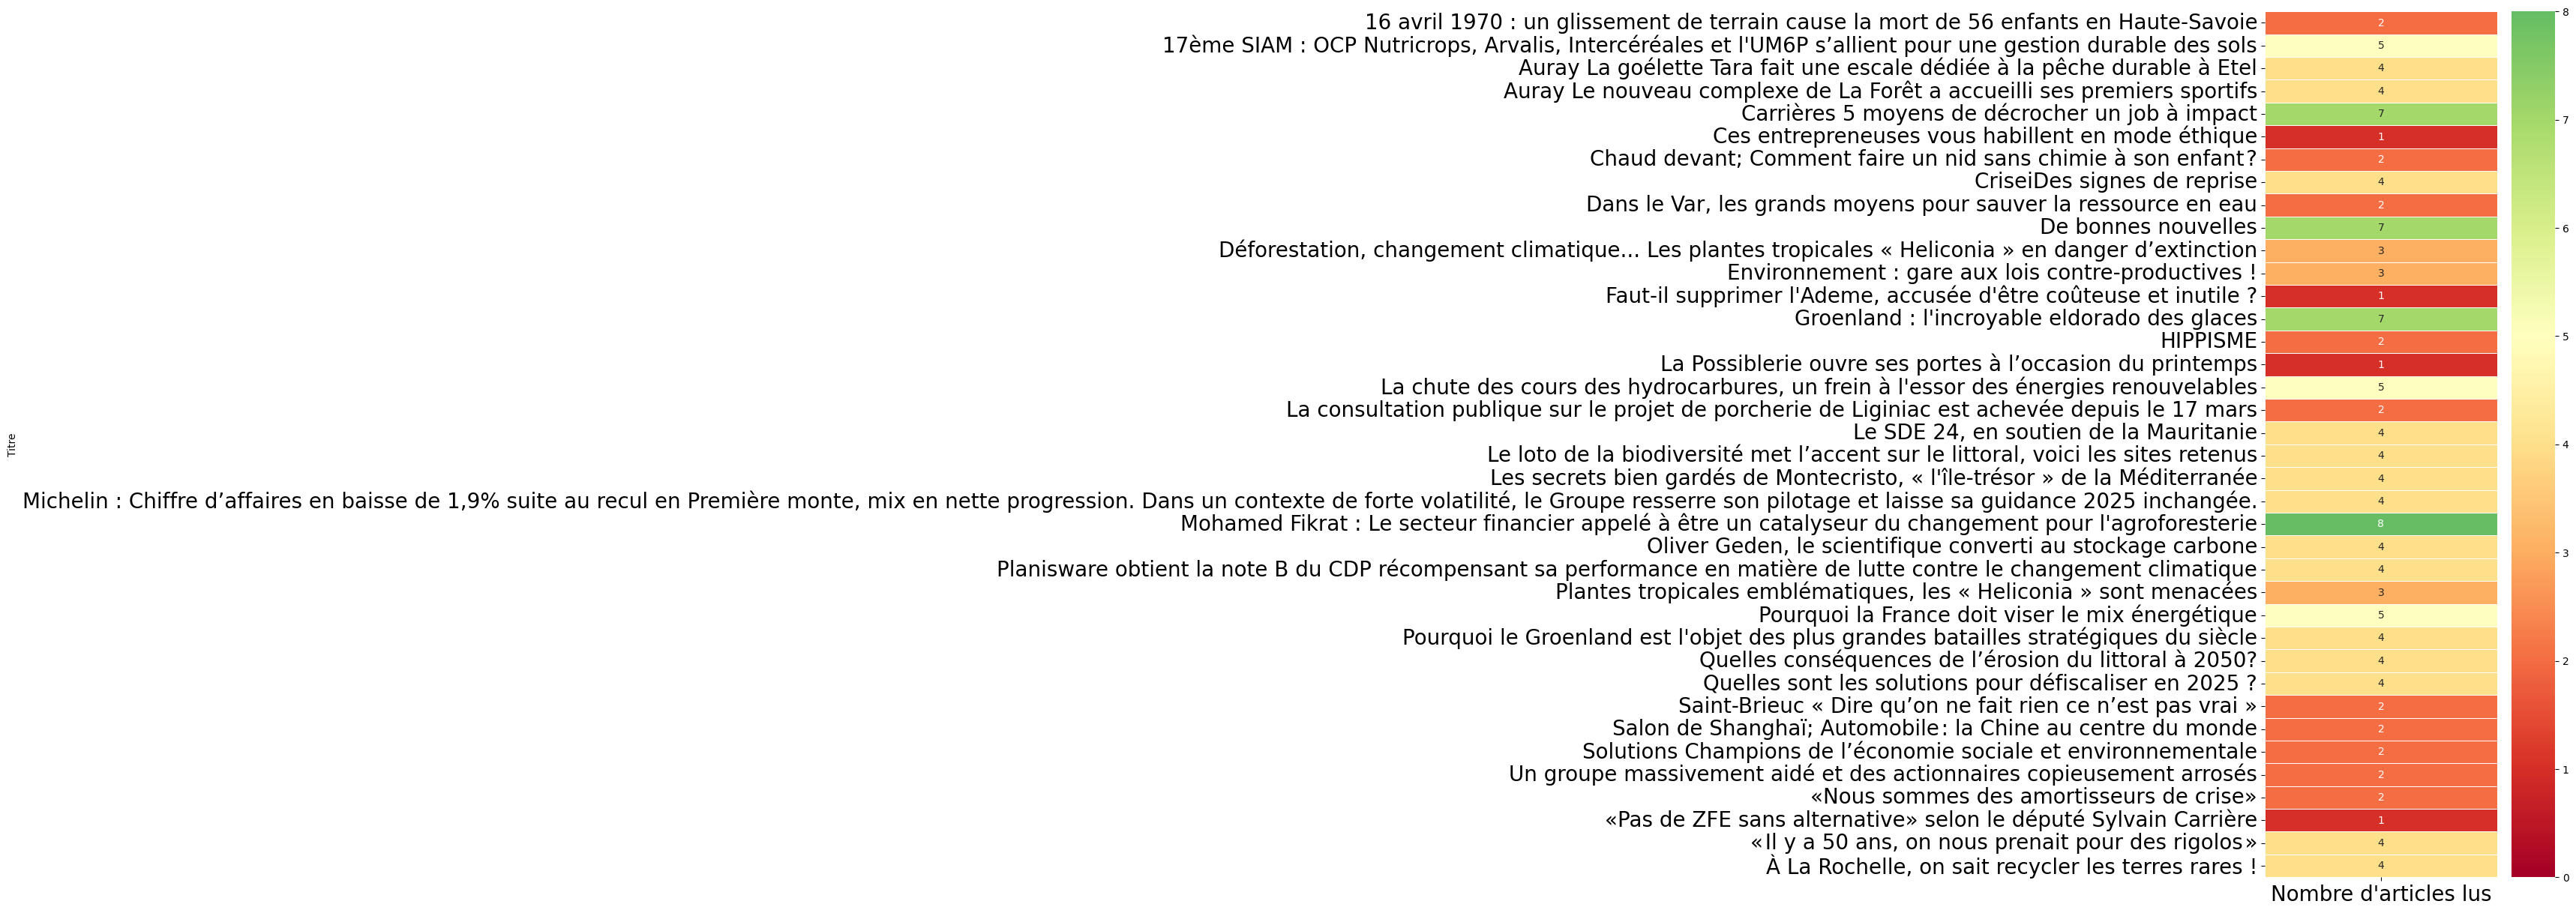

In [11]:
# Visualisation
plt.figure(figsize=(5, 15))
heatmap_data = df[df["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5
)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

In [12]:
# Préparation des données
df_base = df[df["Pack"] == "Base"]
df_premium = df[df["Pack"] == "premium"]

heatmap_base = df_base[df_base["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")
heatmap_premium = df_premium[df_premium["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")

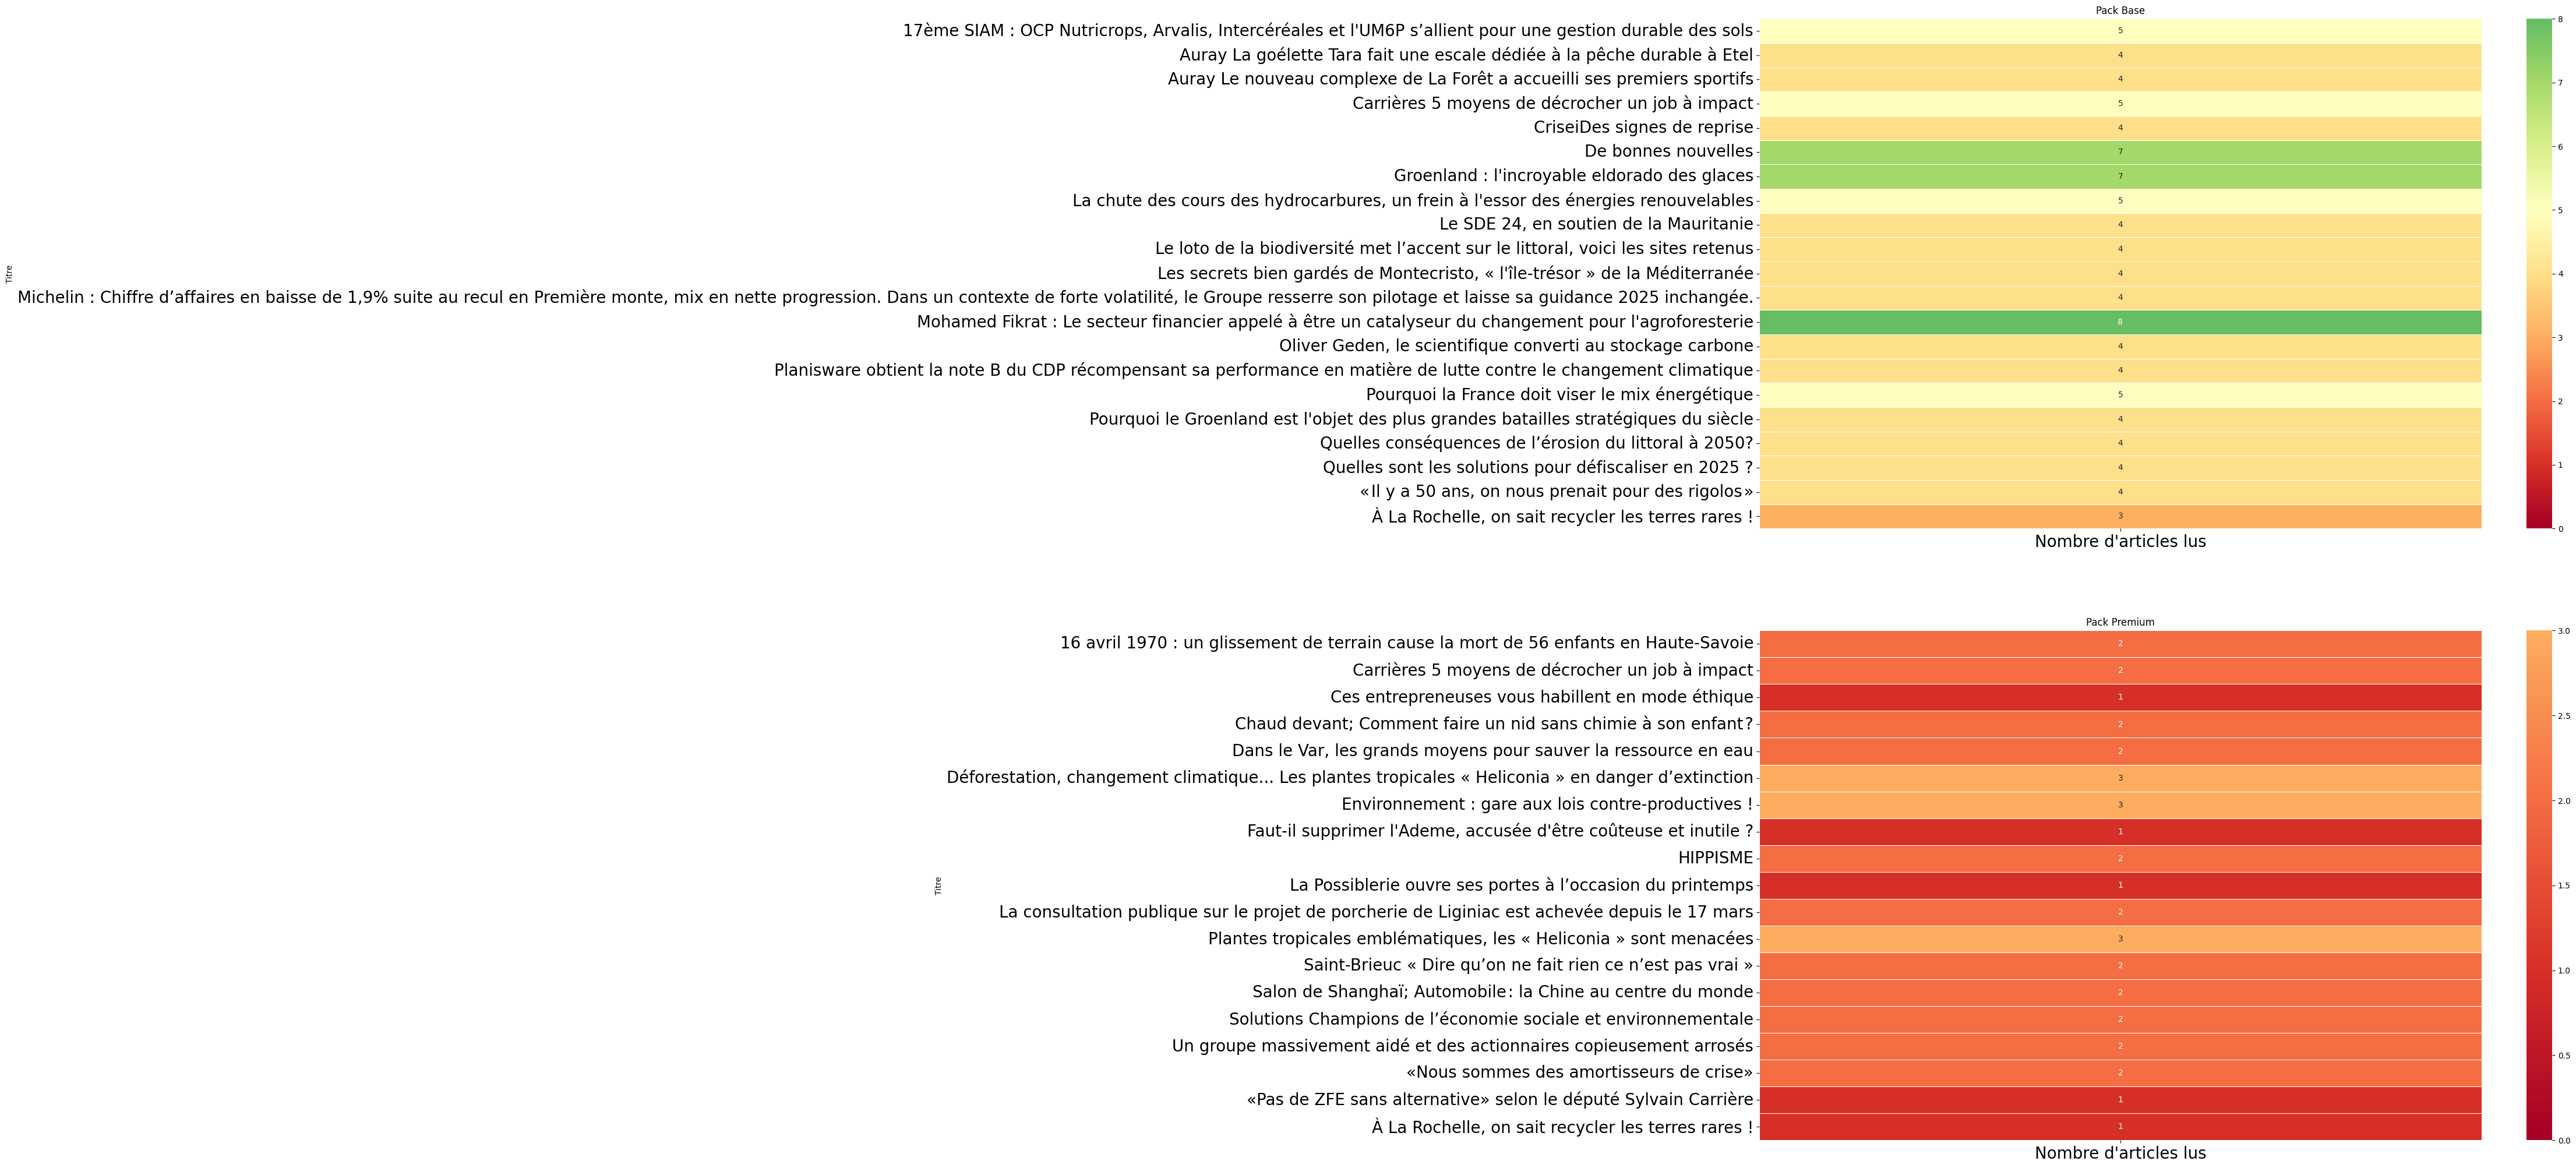

In [13]:
# Visualisation
fig, ax = plt.subplots(2, 1, figsize=(20, 25))
ax[0].set_title("Pack Base")
sns.heatmap(
    heatmap_base,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5,
    ax = ax[0]
)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)


ax[1].set_title("Pack Premium")
sns.heatmap(
    heatmap_premium,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5,
    ax = ax[1]
)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)

## Analyse Pack Base

### Exploration des résultats sur un article

In [14]:
# Choix des paramètres
liste_articles = df_base.Titre.unique().tolist()
id_article = 2
df_article = df_base[df_base.Titre == liste_articles[id_article]]
df_article

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau,veille_ok
2,veilleur_1,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,solutions,Agriculture/Alimentation,Agriculture/Alimentation,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...,True
21,veilleur_10,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
58,veilleur_12,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,Aucun de ces secteurs,NaN,solutions,écosystème/ espèce,NON,solutions,Océans,NaN,NaN,NaN,NaN,NaN,True
75,veilleur_13,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,Ecosystèmes,Ecosystèmes,NaN,NaN,NaN,solutions,Océans,NaN,NaN,NaN,NaN,NaN,True
149,veilleur_5,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,"Ecosystèmes, Agriculture/Alimentation",Agriculture/Alimentation,NaN,NaN,NaN,"constats, solutions",Océans,NaN,NaN,NaN,Sujet : Article sur une association qui sensib...,NaN,True


In [15]:
df_article.columns

Index(['Personne en charge de la veille (nom, prénom)', 'Pack', 'Titre',
       'Lien ou titre de l'article',
       'Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?',
       'L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?',
       'L'article traite-t-il d'un ou plusieurs secteurs en particulier ?',
       'Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?',
       'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Quels enjeux sont évoqués ?',
       'L'article parle-t-il d'un évènement climatique?',
       'Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Type(s) de milieu mentionné(s)?',
       'L'article évoque-t-il les causes de l'érosion de la biodiversité?',
       'Si l'article parle de la crise des ressources, évoque-t-il les causes,

In [16]:
def plot_countplots(df, cols, titles, hue="Titre", na_label="NA", max_x=10, n_colors = 21):
    """
    Crée une grille de countplots horizontaux avec :
    - séparation des valeurs par virgule
    - 'NA' en bas
    - une seule légende globale en bas
    """
    n = len(cols)
    rows = (n + 2) // 3  # 3 colonnes par ligne
    fig, ax = plt.subplots(rows, 3, figsize=(20, 4 * rows))
    ax = ax.flatten()

    for i, (col, title) in enumerate(zip(cols, titles)):
        data = df[[col, hue]].fillna(na_label)
        data[col] = data[col].astype(str).str.split(",")
        data = data.explode(col)
        data[col] = data[col].str.strip()

        order = [x for x in data[col].value_counts().index if x != na_label] + [na_label]

        sns.countplot(
            data=data,
            y=col,
            hue=hue,
            order=order,
            palette=distinctipy.get_colors(n_colors),
            ax=ax[i],
            legend=(i == 0)  # légende seulement pour le 1er
        )

        ax[i].set_title(title)
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
        ax[i].set_xlim(0, max_x)

    # Supprimer axes vides
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])


    # Récupérer handles/labels et placer légende en bas
    # --- Création des labels légende avec nombre de lectures ---
    counts = df[hue].value_counts()
    handles, labels = ax[0].get_legend_handles_labels()

    labels_with_counts = [
        f"{label} (n={counts.get(label, 0)})" for label in labels
    ]
    
    ax[0].legend_.remove()
    
    # --- Création de la légende globale ---
    fig.legend(
        handles, labels_with_counts,
        title=hue,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.65)  # à droite et centré verticalement
    )

    plt.tight_layout()
    plt.show()

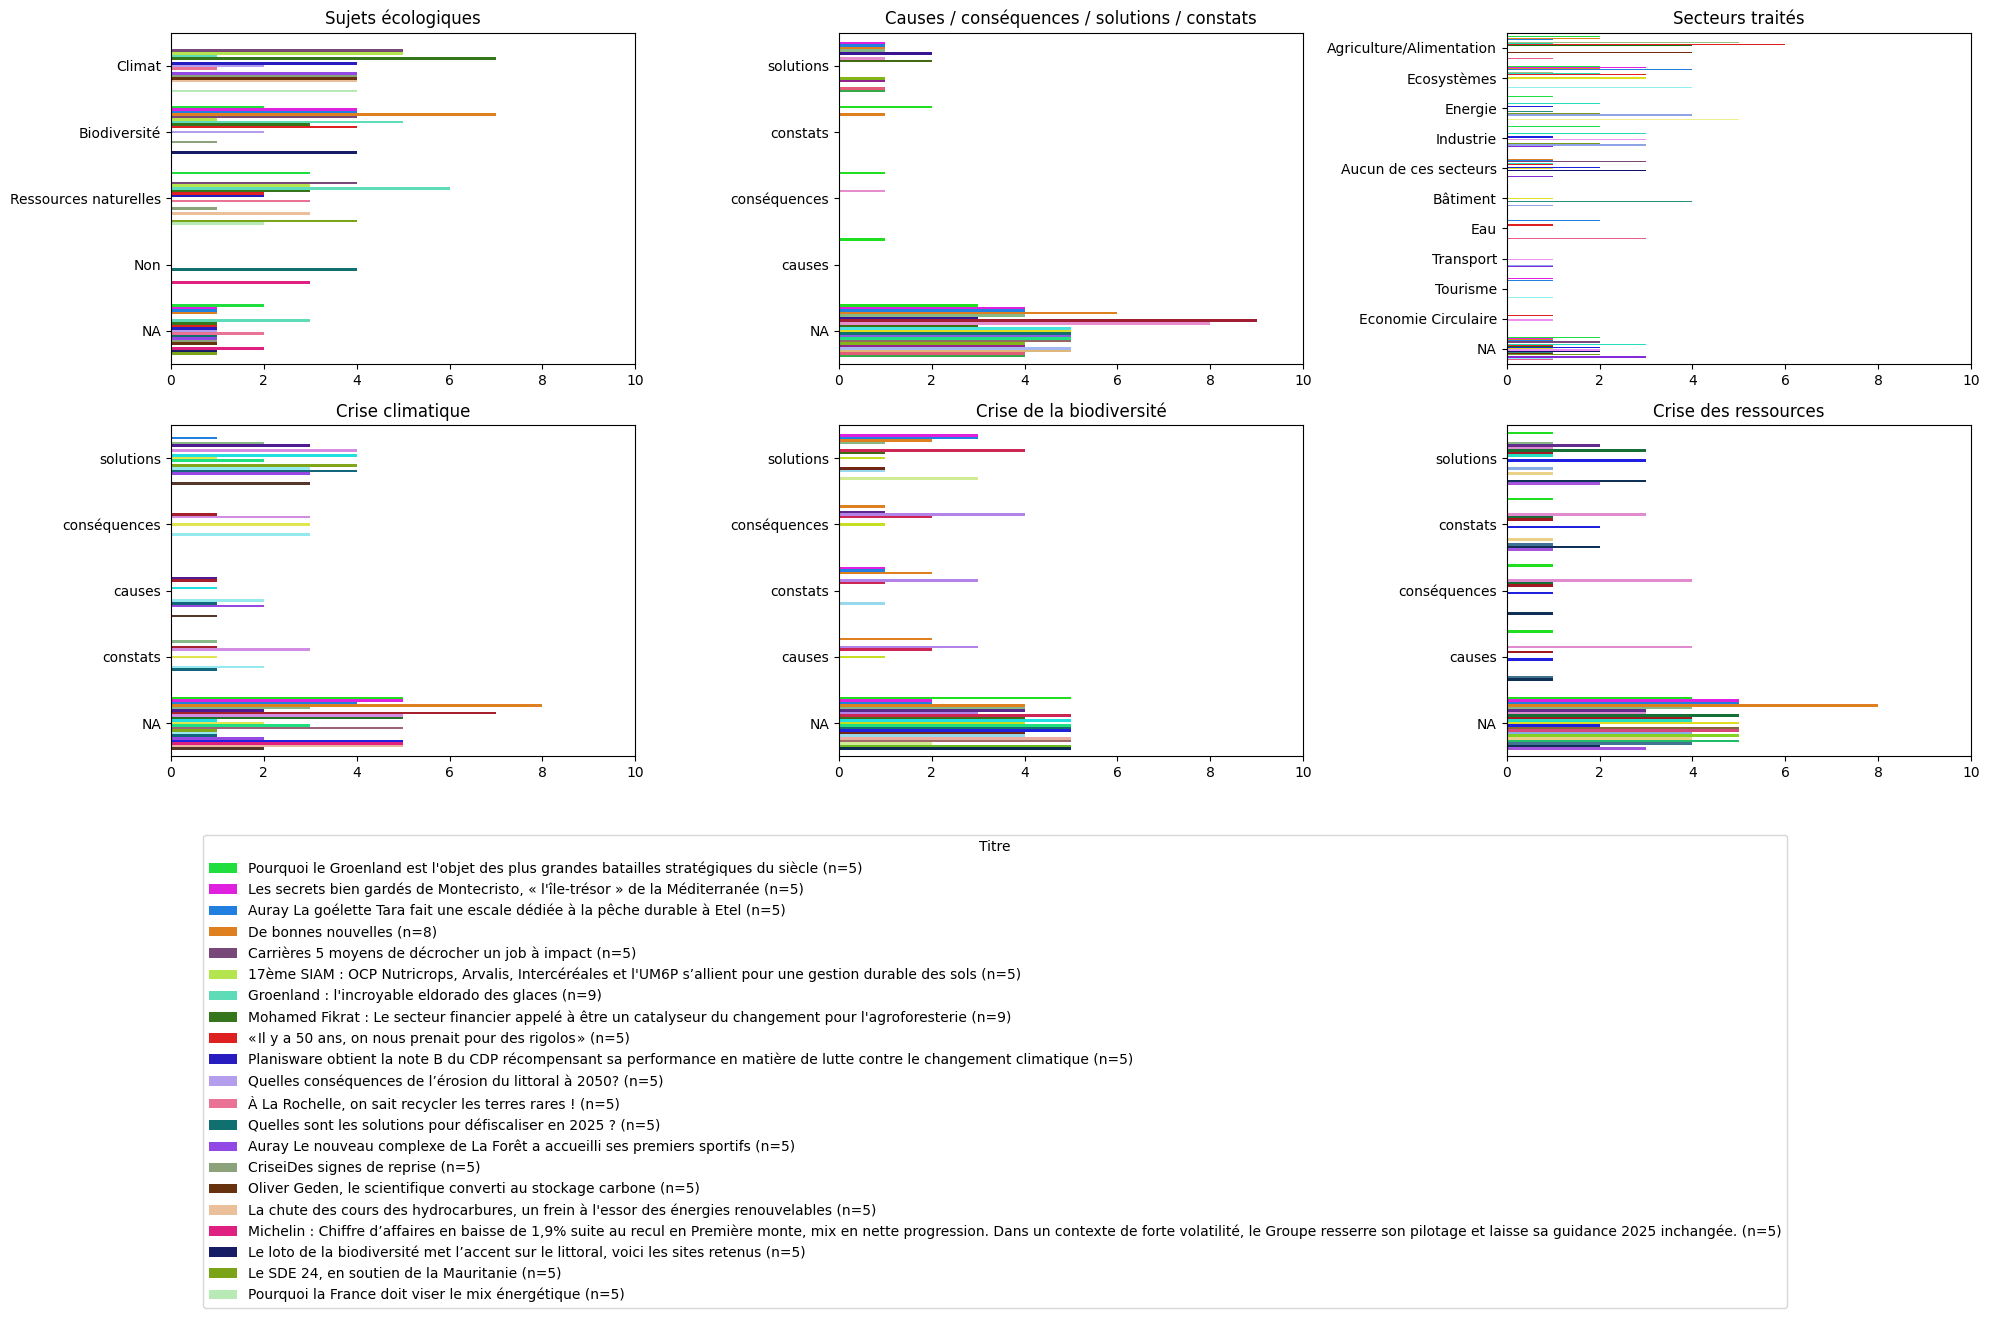

In [17]:
# Remplacer NaN par une modalité explicite
cols = [
    "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?",
    "L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",
    "L'article traite-t-il d'un ou plusieurs secteurs en particulier ?",
    "Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?"
]

titles = [
    "Sujets écologiques",
    "Causes / conséquences / solutions / constats",
    "Secteurs traités",
    "Crise climatique",
    "Crise de la biodiversité",
    "Crise des ressources" 
]

# Graphique des countplots
plot_countplots(df_base, cols, titles, hue="Titre", na_label="NA", max_x=10)

# Analyse statistique

https://theses.hal.science/LIDILEM/hal-04194831v1
=> Plusieurs méthodes de calcul ont été proposées pour quantifier le degré d’accord entre annotateurs. L’une des plus employées, malgré certains défauts (Feinstein et Cicchetti, 1990) et des restrictions sur son utilisation, est le Kappa (κ) de Cohen (Cohen, 1960). Des variations ont été proposées pour répondre à ses défauts ou limitations, comme le Kappa de Fleiss qui permet de prendre en compte trois ou plus annotateurs, ou le Kappa pondéré (Fleiss et al., 1969). D’autres méthodes ont également été développées comme le coefficient de Brennan-Prediger (Brennan et Prediger, 1981), le coefficient AC1/AC2 de Gwet (Gwet, 2008) ou plus récemment la méthode Gamma (Mathet et al., 2015). Pour cette communication, nous proposons d’examiner une mesure d’accord spécifique, l’Alpha de Krippendorff (Krippendorff, 2018). L’Alpha de Krippendorff, contrairement à d’autres mesures de l’accord inter-annotateurs, a été pensé pour répondre à des situations diverses. L’Alpha est en effet applicable quel que soit le nombre d’annotateurs et permet de prendre en compte plusieurs contraintes sur les données : • données évaluées sur différents types d’échelle (échelle nominale, ordinale, d’intervalle...) ; • échantillons de données de taille variable ; • données avec des annotations manquantes



## Test de l'alpha de Krippendorff sur une colonne spécifique, pour un article spécifique

In [18]:
# Test de l'alhpa de Krippendorff sur une colonne spécifique
col_to_test = "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"
titre = liste_articles[6]
data_test = df_base[df_base.Titre == titre][["Personne en charge de la veille (nom, prénom)", "Titre", col_to_test]]
data_test

,"Personne en charge de la veille (nom, prénom)",Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?
6,veilleur_1,Groenland : l'incroyable eldorado des glaces,NaN
27,veilleur_10,Groenland : l'incroyable eldorado des glaces,NaN
38,veilleur_11,Groenland : l'incroyable eldorado des glaces,"Biodiversité, Ressources naturelles"
57,veilleur_12,Groenland : l'incroyable eldorado des glaces,Ressources naturelles
92,veilleur_2,Groenland : l'incroyable eldorado des glaces,"Biodiversité, Ressources naturelles"
134,veilleur_4,Groenland : l'incroyable eldorado des glaces,NaN
154,veilleur_5,Groenland : l'incroyable eldorado des glaces,"Ressources naturelles, Biodiversité"
183,veilleur_7,Groenland : l'incroyable eldorado des glaces,"Climat, Biodiversité, Ressources naturelles"
215,veilleur_9,Groenland : l'incroyable eldorado des glaces,"Ressources naturelles, Biodiversité"


In [19]:
# Test encodaoge
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Nettoyage : remplacer NaN par listes vides et transformer en liste de labels
data_test_encoded = data_test.copy()
data_test_encoded[col_to_test] = data_test_encoded[col_to_test].fillna("").apply(lambda x: [s.strip() for s in x.split(",")] if x else [])

# 2. Initialiser l'encodeur multilabel
mlb = MultiLabelBinarizer()

# 3. Transformer les données
encoded = mlb.fit_transform(data_test_encoded[col_to_test])

# 4. Créer un DataFrame avec les colonnes binaires
encoded_df = pd.DataFrame(encoded, columns=mlb.classes_, index=data_test_encoded.index)

# 5. Fusionner avec le DataFrame original
df_encoded = pd.concat([data_test_encoded, encoded_df], axis=1)

In [20]:
df_encoded

,"Personne en charge de la veille (nom, prénom)",Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,Biodiversité,Climat,Ressources naturelles
6,veilleur_1,Groenland : l'incroyable eldorado des glaces,[],0,0,0
27,veilleur_10,Groenland : l'incroyable eldorado des glaces,[],0,0,0
38,veilleur_11,Groenland : l'incroyable eldorado des glaces,"[Biodiversité, Ressources naturelles]",1,0,1
57,veilleur_12,Groenland : l'incroyable eldorado des glaces,[Ressources naturelles],0,0,1
92,veilleur_2,Groenland : l'incroyable eldorado des glaces,"[Biodiversité, Ressources naturelles]",1,0,1
134,veilleur_4,Groenland : l'incroyable eldorado des glaces,[],0,0,0
154,veilleur_5,Groenland : l'incroyable eldorado des glaces,"[Ressources naturelles, Biodiversité]",1,0,1
183,veilleur_7,Groenland : l'incroyable eldorado des glaces,"[Climat, Biodiversité, Ressources naturelles]",1,1,1
215,veilleur_9,Groenland : l'incroyable eldorado des glaces,"[Ressources naturelles, Biodiversité]",1,0,1


In [21]:
# Calcul de l'alpha de Krippendorff
krippendorff_alpha = krippendorff.alpha(
    df_encoded[mlb.classes_].values,
    level_of_measurement='nominal'
)
krippendorff_alpha

np.float64(0.1694444444444445)

In [22]:
# Insertion dans le dataframe
result_df = pd.DataFrame({
    "Titre": [titre],
    "Variable": [col_to_test],
    "Alpha de Krippendorff": [krippendorff_alpha]
})
result_df

,Titre,Variable,Alpha de Krippendorff
0,Groenland : l'incroyable eldorado des glaces,Le sujet de l'article concerne-t-il un ou plus...,0.169444


## Alpha par article et variable

In [23]:
# Boucle sur tous les articles, toutes les colonnes
result_df = pd.DataFrame()
for titre in df_base.Titre.unique():  
    for col_to_test in df_base.columns[4:16]:
        
        # Créer le dataset
        data_test = df_base[df_base.Titre == titre][["Personne en charge de la veille (nom, prénom)", "Titre", col_to_test]]    
        data_test_encoded = data_test.copy()
        
        # Vérification si la colonne est vide:
        if data_test_encoded[col_to_test].isna().all():
            print(f"La colonne '{col_to_test}' pour l'article '{titre}' est vide. Passer à la suivante.")
            krippendorff_alpha = None
            
        else:
            # Nettoyage : remplacer NaN par listes vides et transformer en liste de labels
            data_test_encoded[col_to_test] = data_test_encoded[col_to_test].fillna("").apply(lambda x: [s.strip() for s in x.split(",")] if x else [])
  
            # Initialiser l'encodeur multilabel
            mlb = MultiLabelBinarizer() 
            
            # Transformer les données
            encoded = mlb.fit_transform(data_test_encoded[col_to_test])
            
            # Créer un DataFrame avec les colonnes binaires
            encoded_df = pd.DataFrame(encoded, columns=mlb.classes_, index=data_test_encoded.index)
            
            # Fusionner avec le DataFrame original
            df_encoded = pd.concat([data_test_encoded, encoded_df], axis=1)

            # Calcul de l'alpha de Krippendorff
            try:
                krippendorff_alpha = krippendorff.alpha(
                    df_encoded[mlb.classes_].values,
                    level_of_measurement='nominal'
                )   
            except Exception as e:
                print(f"Erreur lors du calcul de l'alpha de Krippendorff pour '{titre}' et '{col_to_test}': {e}")
                krippendorff_alpha = None
            
            
        # Insertion dans le dataframe
        result_df = pd.concat([
            result_df,
            pd.DataFrame({
                "Titre": [titre],
                "Variable": [col_to_test],
                "Alpha de Krippendorff": [krippendorff_alpha]
            })
        ], ignore_index=True)       

# Affichage des résultats
result_df

La colonne 'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?' pour l'article 'Pourquoi le Groenland est l'objet des plus grandes batailles stratégiques du siècle' est vide. Passer à la suivante.
La colonne 'Quels enjeux sont évoqués ?' pour l'article 'Pourquoi le Groenland est l'objet des plus grandes batailles stratégiques du siècle' est vide. Passer à la suivante.
La colonne 'Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?' pour l'article 'Pourquoi le Groenland est l'objet des plus grandes batailles stratégiques du siècle' est vide. Passer à la suivante.
La colonne 'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?' pour l'article 'Les secrets bien gardés de Montecristo, « l'île-trésor » de la Méditerranée' est vide. Passer à la suivante.
La colonne 'Quels enjeux sont évoqués ?' pour l'article 'Les secrets bien

,Titre,Variable,Alpha de Krippendorff
0,Pourquoi le Groenland est l'objet des plus gra...,Le sujet de l'article concerne-t-il un ou plus...,-0.080000
1,Pourquoi le Groenland est l'objet des plus gra...,"L'article évoque-t-il les causes, conséquences...",-0.113636
2,Pourquoi le Groenland est l'objet des plus gra...,L'article traite-t-il d'un ou plusieurs secteu...,-0.148352
3,Pourquoi le Groenland est l'objet des plus gra...,"Si l'article aborde des SOLUTIONS, sur quel(s)...",0.000000
4,Pourquoi le Groenland est l'objet des plus gra...,"Si l'article parle de la crise climatique, évo...",NaN
...,...,...,...
247,Pourquoi la France doit viser le mix énergétique,Si l'article parle de la crise de la biodivers...,NaN
248,Pourquoi la France doit viser le mix énergétique,Type(s) de milieu mentionné(s)?,NaN
249,Pourquoi la France doit viser le mix énergétique,L'article évoque-t-il les causes de l'érosion ...,NaN
250,Pourquoi la France doit viser le mix énergétique,"Si l'article parle de la crise des ressources,...",-0.071429


In [24]:
# 1. Transformation en tableau croisé
heatmap_data = result_df.pivot(index="Variable", columns="Titre", values="Alpha de Krippendorff")

In [25]:
# Exporte le DataFrame agrégé dans un fichier Excel
output_file = os.path.join(data_dir, "Analyse_lecture_presse-ecrite_Ete2025_Krippendorff.csv")
result_df.to_csv(output_file, index=False)

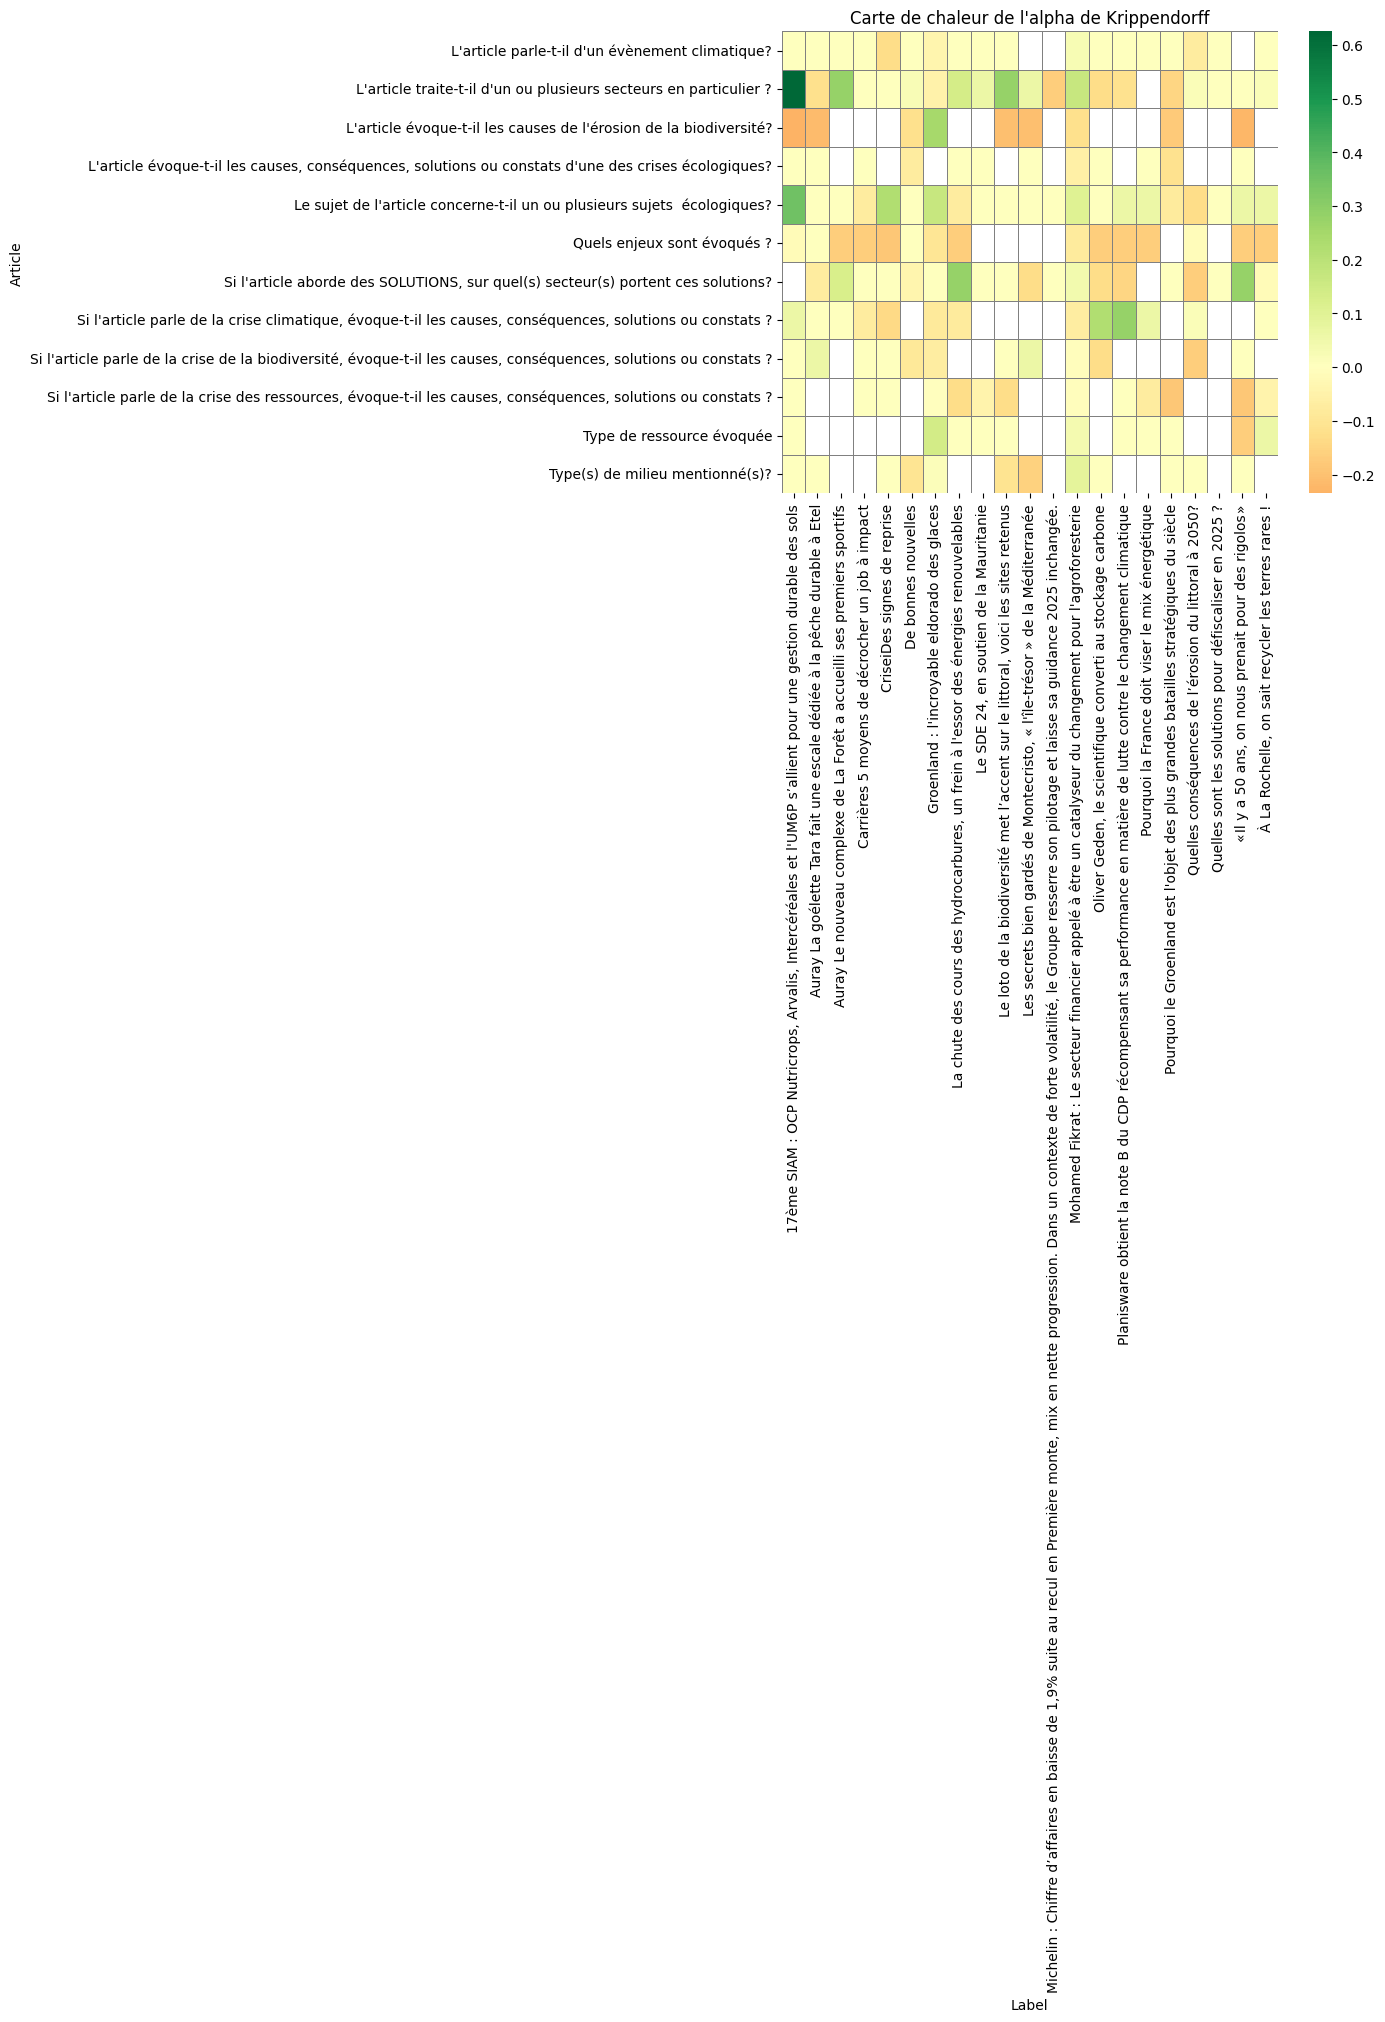

In [26]:
# 2. Création du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=False,        # Afficher les valeurs
    cmap="RdYlGn",   # Palette de couleurs
    center=0,          # Centre la palette sur zéro
    linewidths=0.5,    # Lignes séparatrices
    linecolor="grey"
)

plt.title("Carte de chaleur de l'alpha de Krippendorff")
plt.xlabel("Label")
plt.ylabel("Article")
plt.show()

## Alpha par variable

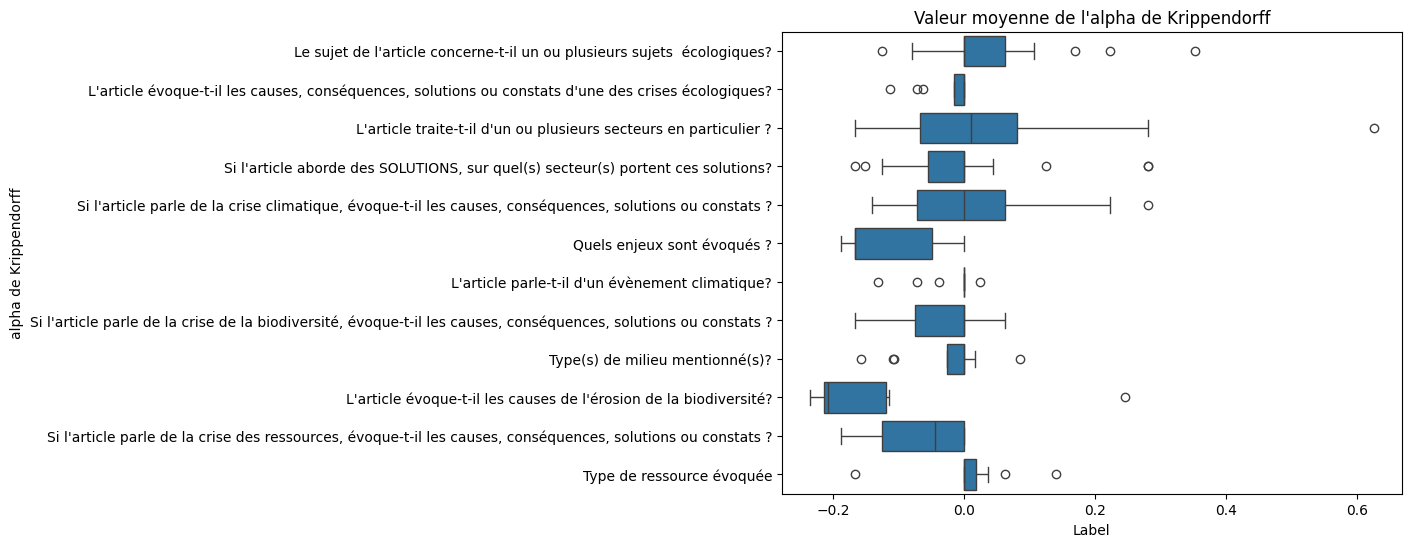

In [27]:
# Valeur moyenne par type de variable
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=result_df,
    y="Variable",
    x="Alpha de Krippendorff",
)

plt.title("Valeur moyenne de l'alpha de Krippendorff")
plt.xlabel("Label")
plt.ylabel("alpha de Krippendorff")
plt.show()